In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [1]:
def load_diabetes_data(path = "/Users/deberend/Desktop/Cornell Tech/Topics in Data Science and OR/Midterm Project/samadult.csv"):
    # load in the original data
    diabetes_orig = pd.read_csv(path)

    # take just one person from each household
    diabetes = diabetes_orig.groupby("HHX") \
      .sample(1, random_state=24648765) \
      .reset_index() \
      .copy()
    # add an id column
    diabetes["id"] = np.arange(len(diabetes.index))
    # create the house_family_person_id column by joining together three ID columns
    diabetes["house_family_person_id"] = diabetes.apply(lambda x: "_".join(x[["HHX", "FMX", "FPX"]].astype(int).astype(str)), 
                                                        axis=1)
    # create the diabetes column
    diabetes["diabetes"] = (diabetes["DIBEV1"] == 1).astype(int)
    # create coronary heart disease column
    diabetes["coronary_heart_disease"] = (diabetes["CHDEV"] == 1).astype(int)
    # create hypertension column
    diabetes["hypertension"] = (diabetes["HYPEV"] == 1).astype(int)
    # create heart_condition column
    diabetes["heart_condition"] = (diabetes["HRTEV"] == 1).astype(int)
    # create cancer column
    diabetes["cancer"] = (diabetes["CANEV"] == 1).astype(int)
    # create family_history_diabetes column
    diabetes["family_history_diabetes"] = (diabetes["DIBREL"] == 1).astype(int)
    # rename remaining relevant columns
    diabetes = diabetes.rename(columns={"AGE_P": "age",
                                      "SMKEV": "smoker",
                                      "SEX": "sex",
                                      "AWEIGHTP": "weight",
                                      "BMI": "bmi",
                                      "AHEIGHT": "height"})

    # select just the relevant columns
    diabetes = diabetes[["house_family_person_id",
                        "diabetes",
                        "age",
                        "smoker",
                        "sex",
                        "coronary_heart_disease",
                        "weight",
                        "bmi",
                        "height",
                        "hypertension",
                        "heart_condition",
                        "cancer",
                        "family_history_diabetes"]]
    return(diabetes)

In [4]:
df = load_diabetes_data()

In [7]:
df

,house_family_person_id,diabetes,age,smoker,sex,coronary_heart_disease,weight,bmi,height,hypertension,heart_condition,cancer,family_history_diabetes
0,1_2_1,0,24,2,2,0,125,2019,66,0,0,0,0
1,2_1_1,0,76,2,1,0,190,2727,70,1,0,0,0
2,3_1_2,0,36,2,2,0,225,3862,64,0,0,0,1
3,5_1_1,0,35,1,2,0,240,3995,65,0,0,0,1
4,10_1_5,0,20,2,2,0,103,1883,62,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32494,71559_1_1,0,56,1,1,0,172,2399,71,0,0,1,1
32495,71565_1_1,0,58,1,1,0,225,3141,71,1,0,0,1
32496,71569_1_1,1,71,1,2,1,124,2501,59,1,0,0,1
32497,71576_1_1,0,64,1,1,0,188,2945,67,1,0,0,0


In [8]:
# Assuming 'df' is your DataFrame
#df.to_csv('diabetes.csv', index=False)

In [10]:
# Checking for basic statistics and data information to understand the data better
data_info = df.info()
data_description = df.describe()

# Checking for missing values
missing_values = df.isnull().sum()

# Displaying the outputs
data_info, data_description, missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32499 entries, 0 to 32498
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   house_family_person_id   32499 non-null  object
 1   diabetes                 32499 non-null  int64 
 2   age                      32499 non-null  int64 
 3   smoker                   32499 non-null  int64 
 4   sex                      32499 non-null  int64 
 5   coronary_heart_disease   32499 non-null  int64 
 6   weight                   32499 non-null  int64 
 7   bmi                      32499 non-null  int64 
 8   height                   32499 non-null  int64 
 9   hypertension             32499 non-null  int64 
 10  heart_condition          32499 non-null  int64 
 11  cancer                   32499 non-null  int64 
 12  family_history_diabetes  32499 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 3.2+ MB


(None,
            diabetes           age        smoker           sex  \
 count  32499.000000  32499.000000  32499.000000  32499.000000   
 mean       0.107142     51.051017      1.608942      1.547494   
 std        0.309298     18.511120      0.609761      0.497747   
 min        0.000000     18.000000      1.000000      1.000000   
 25%        0.000000     35.000000      1.000000      1.000000   
 50%        0.000000     52.000000      2.000000      2.000000   
 75%        0.000000     66.000000      2.000000      2.000000   
 max        1.000000     85.000000      9.000000      2.000000   
 
        coronary_heart_disease        weight           bmi        height  \
 count            32499.000000  32499.000000  32499.000000  32499.000000   
 mean                 0.055232    251.113850   3045.910736     68.817748   
 std                  0.228437    240.280025   1451.552127      8.459210   
 min                  0.000000    100.000000   1167.000000     59.000000   
 25%             

## Initial thoughts:
#### Data Structure:
- No missing values in any of the columns.
- The dataset includes 12 numerical columns and 1 object column (house_family_person_id). 

#### Statistical Summary:

**Diabetes**: 10.7% of the individuals have diabetes.

**Age**: The age range is from 18 to 85, with an average of 51 years.

**Smoker**: The majority are non-smokers, but there are some anomalies with values exceeding 2, which might indicate errors.

**Sex**: There seems to be a roughly even split between male (1) and female (2) participants.

**Weight**: Ranges from 100 to 999 pounds, with an average around 251 pounds. 
   - Extreme values (e.g., 999) suggest unreasonable outluers.

**BMI**: Varies from 1167 to 9999 (it appears the BMI has been scaled by a factor of 1000), with a mean of 3045 (or a BMI of 30.45 when scaled back). 
   - Again, unreasonable outlier values here 

**Height**: Ranges from 59 to 99 inches.
   - 99 inch could be possible but very unlikely, so adjust for that
    

Other health indicators:
- 35.6% have hypertension.
- 8.9% have heart conditions.
- 11.3% have cancer.
- 35.4% have a family history of diabetes.

Potential Anomalies:

The smoker column has values above 2, which may represent errors.

### Potential subsequent action items:
- make house_family_person_id numeric
- fix scale on BMI (divide by 1000)
- fix inconsistent values in the smoker column
- standardize or normalize? (might not be necessary)
- OHE for the categorical variables; smoker and sex, and maybe for BMI and age (by using age bins)
- weight and bmi outliers: Values of 999 for weight and BMI, or extremely high values (e.g., 9999 BMI), suggest outliers or potential errors. You should review these values and decide whether to correct or remove them. This could be done via:
    - Outlier detection (e.g., based on interquartile ranges).
    - Reassessing if these entries represent real-world data (e.g., by calculating BMI from weight and height).
    - other ways?
- Diabetes Imbalance: Only about 10.7% of the individuals have diabetes. If you plan to build models for prediction, you may want to address this imbalance using:
    - Oversampling (e.g., SMOTE) or Undersampling.
    
   
    
    
Feature engineering:
- **Age Binning**: Since age has a clear relationship with diabetes, creating age bins (e.g., under 30, 30-50, 50+) to could make the data more interpretable and facilitate categorical analysis. This could help in understanding the risk of diabetes across different life stages.
- **BMI Categories**: Similarly, convert BMI into standard categories (e.g., underweight, normal, overweight, obese) based on medical guidelines. This could help in visual storytelling and improve model performance if you're using machine learning.



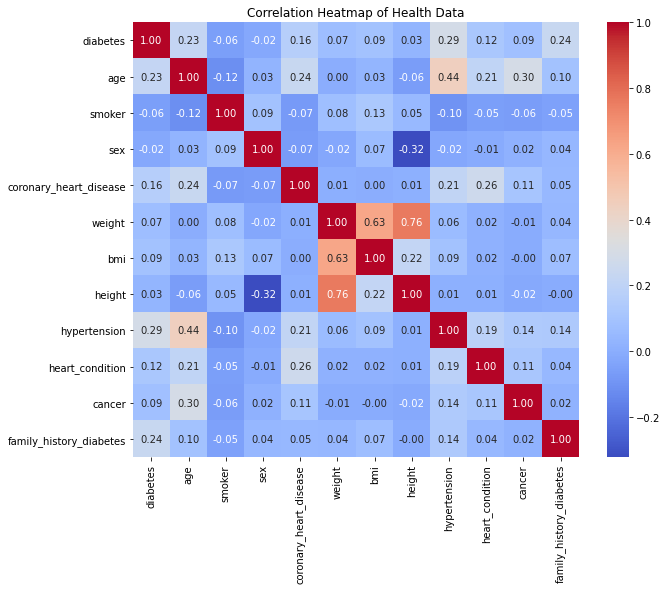

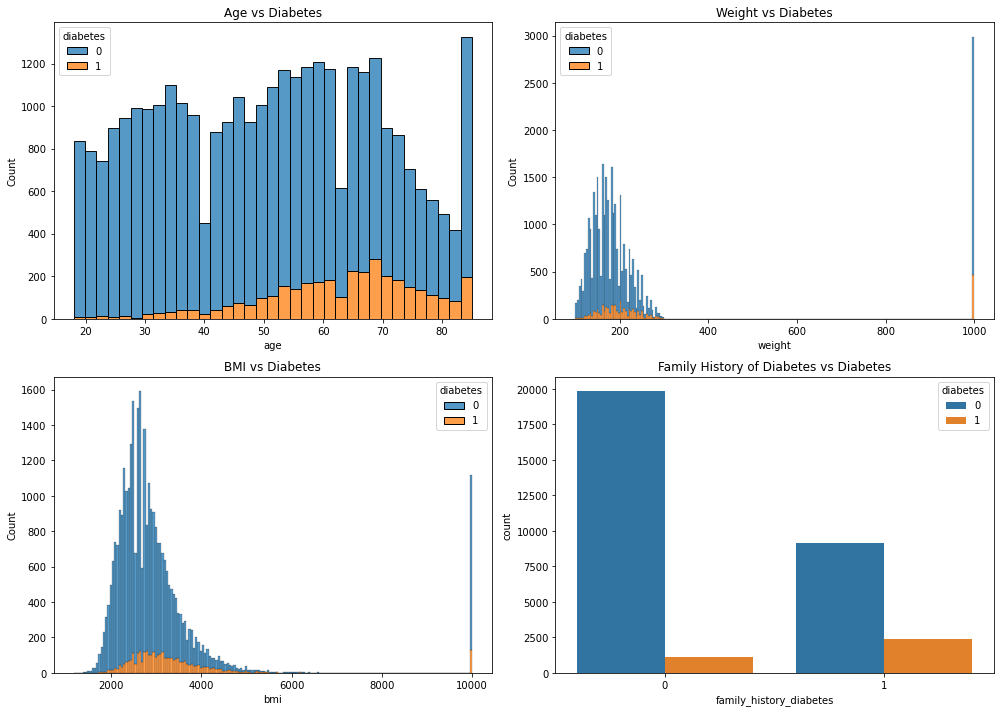

In [15]:
# Plotting the correlation heatmap for all numerical columns
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Health Data")
plt.show()

# Visualizing the distribution of diabetes across key variables
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Age vs Diabetes
sns.histplot(data=df, x='age', hue='diabetes', multiple='stack', ax=axes[0, 0])
axes[0, 0].set_title('Age vs Diabetes')

# Weight vs Diabetes
sns.histplot(data=df, x='weight', hue='diabetes', multiple='stack', ax=axes[0, 1])
axes[0, 1].set_title('Weight vs Diabetes')

# BMI vs Diabetes
sns.histplot(data=df, x='bmi', hue='diabetes', multiple='stack', ax=axes[1, 0])
axes[1, 0].set_title('BMI vs Diabetes')

# Family History of Diabetes vs Diabetes
sns.countplot(data=df, x='family_history_diabetes', hue='diabetes', ax=axes[1, 1])
axes[1, 1].set_title('Family History of Diabetes vs Diabetes')

plt.tight_layout()
plt.show()